# 02 - Análise Exploratória

## 2.1 Pré-processamento específico para EDA
## 2.2 Análise Temporal das Ocorrências
### 2.2.1 Ocorrências por Ano
### 2.2.2 Ocorrências por Mês
### 2.2.3 Ocorrências por Hora e Tipo de Operação
## 2.3 Análise dos Fatores Contribuintes
### 2.3.1 Frequência dos Fatores Causadores
### 2.3.2 Fatalidades por Localidade ao Longo dos Anos
##2.3.3. Armazenamento do arquivo final para etapa de hipóteses e estatística

**02 Análise Exploratória**

- Este notebook tem como objetivo realizar uma análise exploratória das ocorrências aeronáuticas, com foco em entender padrões temporais, fatores contribuintes e aspectos críticos dos acidentes e incidentes registrados.

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df_tab_analise = pd.read_csv('/content/drive/MyDrive/DESAFIOA3DATA/base_tratada/df_tab_analise.csv')
df_tab_analise.head(10)

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,...,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao,fator_area_FATOR HUMANO,fator_area_FATOR MATERIAL,fator_area_FATOR OPERACIONAL,fator_area_OUTRO
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,NaN,...,NaN,CIRCUITO DE TRÁFEGO,EXPERIMENTAL,SUBSTANCIAL,0.0,2016-07-30,0.0,0.0,0.0,0.0
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,...,SSKW,POUSO,TÁXI AÉREO,SUBSTANCIAL,0.0,2016-07-30,0.0,0.0,1.0,0.0
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,NaN,2008-08-07,15:10:00,SIM,...,SWRL,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,0.0,2016-07-30,0.0,0.0,1.0,0.0
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,NaN,2011-08-11,17:00:00,SIM,...,NaN,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,0.0,2016-07-30,0.0,0.0,1.0,1.0
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,NaN,2009-12-28,17:30:00,SIM,...,NaN,DECOLAGEM,ESPECIALIZADA,SUBSTANCIAL,1.0,2016-07-30,1.0,0.0,1.0,0.0
5,46633,ACIDENTE,FALHA DO MOTOR EM VOO,ABADIA DE GOIÁS,GO,BRASIL,NaN,2012-11-15,12:40:00,NaN,...,NaN,MANOBRA,EXPERIMENTAL,SUBSTANCIAL,0.0,2016-07-30,0.0,0.0,0.0,0.0
6,43063,ACIDENTE,PERDA DE CONTROLE EM VOO,ALTO ALEGRE,RR,BRASIL,NaN,2010-09-21,17:10:00,SIM,...,NaN,POUSO,TÁXI AÉREO,SUBSTANCIAL,0.0,2016-07-30,1.0,0.0,1.0,1.0
7,45280,ACIDENTE,FALHA DO MOTOR EM VOO,ALTO ALEGRE,RR,BRASIL,NaN,2011-11-22,16:40:00,SIM,...,NaN,CRUZEIRO,TÁXI AÉREO,DESTRUÍDA,1.0,2016-07-30,0.0,0.0,1.0,0.0
8,34515,ACIDENTE,FALHA DO MOTOR EM VOO,ALTO ALEGRE,RR,BRASIL,NaN,2008-11-16,12:25:00,SIM,...,SWUQ,CRUZEIRO,TÁXI AÉREO,SUBSTANCIAL,0.0,2016-07-30,0.0,0.0,1.0,0.0
9,45940,ACIDENTE,INDETERMINADA,ALTO ALEGRE,RR,BRASIL,NaN,2010-06-09,13:00:00,SIM,...,NaN,INDETERMINADA,PRIVADA,DESTRUÍDA,1.0,2016-07-30,0.0,0.0,0.0,0.0


In [164]:
df_tab_analise.describe(include='all')

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,...,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao,fator_area_FATOR HUMANO,fator_area_FATOR MATERIAL,fator_area_FATOR OPERACIONAL,fator_area_OUTRO
count,2043.000000,2043,2043,2043,2043,2043,814,2043,2043,1837,...,839,2043,2043,2043,2043.000000,2043,2043.000000,2043.000000,2043.000000,2043.000000
unique,NaN,2,49,815,29,7,305,1510,437,2,...,391,24,10,5,NaN,1,NaN,NaN,NaN,NaN
top,NaN,ACIDENTE,FALHA DO MOTOR EM VOO,RIO DE JANEIRO,SP,BRASIL,SBMT,2012-09-24,20:30:00,SIM,...,SBMT,POUSO,PRIVADA,SUBSTANCIAL,NaN,2016-07-30,NaN,NaN,NaN,NaN
freq,NaN,1484,377,65,442,2035,18,6,55,1833,...,25,391,775,1193,NaN,2043,NaN,NaN,NaN,NaN
mean,43961.869799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.557513,NaN,0.219775,0.021047,0.580519,0.075869
std,7857.658738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.696881,NaN,0.414195,0.143578,0.493595,0.264853
min,25799.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,38839.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
50%,45564.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,0.000000
75%,50353.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,0.000000


**2.1 Pré-processamento específico para EDA**

- Na base de dados fornecida pelo CENIPA, cada linha representa uma combinação entre uma ocorrência e uma aeronave envolvida. Como algumas ocorrências envolvem múltiplas aeronaves, o campo codigo_ocorrencia pode se repetir.

- No entanto, para fins de análise agregada e contagem fiel do número total de ocorrências, é necessário considerar apenas um registro por codigo_ocorrencia.

- Por isso, foi aplicado um filtro para remoção de duplicatas com base nesse campo, de modo que cada ocorrência seja tratada como evento único, independentemente do número de aeronaves envolvidas.

In [165]:
#criação de novo dataframe contendo codigo_ocorrencia únicos

df_tab_analise_ocorrencias = df_tab_analise.drop_duplicates(subset='codigo_ocorrencia')

print(f"Quantidade total de linhas no dataframe df_tab_analise_ocorrencias: {len(df_tab_analise_ocorrencias)}")


Quantidade total de linhas no dataframe df_tab_analise_ocorrencias: 2027


**2.2 Análise Temporal das Ocorrências**

criação de campos "ano","mes","dia" utilizando o campo "dia_ocorrencia".

In [166]:
df_tab_analise_ocorrencias['dia_ocorrencia'] = pd.to_datetime(df_tab_analise_ocorrencias['dia_ocorrencia'], errors='coerce')

/tmp/ipython-input-166-2768141027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tab_analise_ocorrencias['dia_ocorrencia'] = pd.to_datetime(df_tab_analise_ocorrencias['dia_ocorrencia'], errors='coerce')


In [167]:
df_tab_analise_ocorrencias['ano'] = df_tab_analise_ocorrencias['dia_ocorrencia'].dt.year
df_tab_analise_ocorrencias['mes'] = df_tab_analise_ocorrencias['dia_ocorrencia'].dt.month
df_tab_analise_ocorrencias['dia'] = df_tab_analise_ocorrencias['dia_ocorrencia'].dt.day

/tmp/ipython-input-167-380136418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tab_analise_ocorrencias['ano'] = df_tab_analise_ocorrencias['dia_ocorrencia'].dt.year
/tmp/ipython-input-167-380136418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tab_analise_ocorrencias['mes'] = df_tab_analise_ocorrencias['dia_ocorrencia'].dt.month
/tmp/ipython-input-167-380136418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [168]:
df_tab_analise_ocorrencias[['dia_ocorrencia', 'ano', 'mes', 'dia']].head()


,dia_ocorrencia,ano,mes,dia
0,2013-05-05,2013,5,5
1,2013-11-25,2013,11,25
2,2008-08-07,2008,8,7
3,2011-08-11,2011,8,11
4,2009-12-28,2009,12,28


**2.2.1 Ocorrências por Ano**

- Identificação de tendências anuais e variações no número de registros.

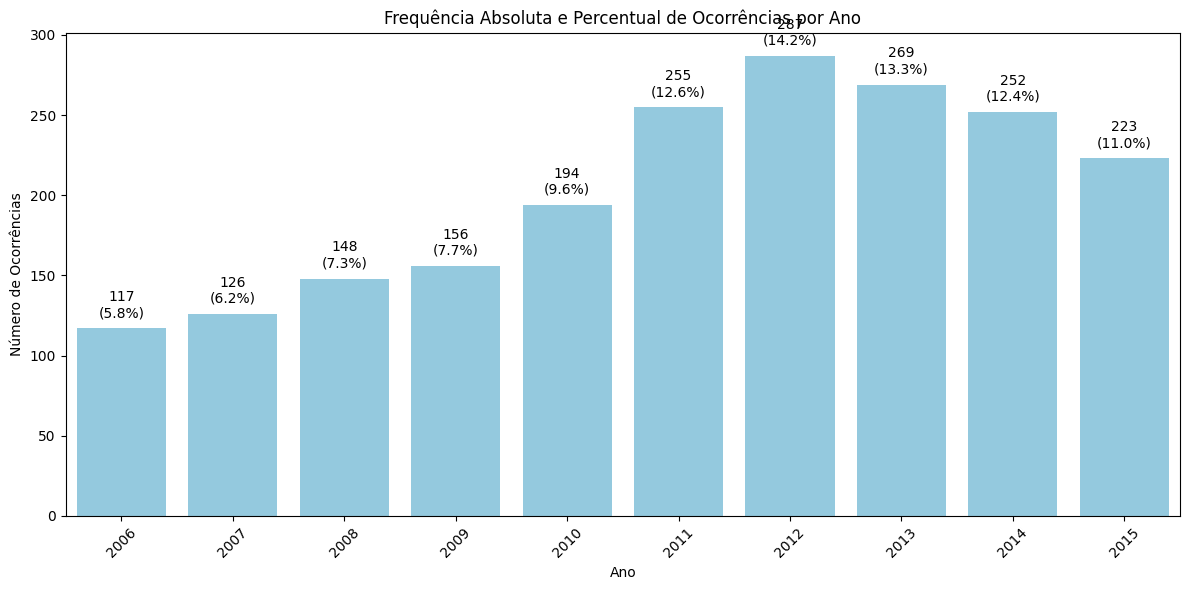

In [169]:
#criação de um gráfico de ocorrencias por ano
# Calcular a frequência absoluta e percentual

frequencia_ano = df_tab_analise_ocorrencias['ano'].value_counts().sort_index()
frequencia_percentual_ano = df_tab_analise_ocorrencias['ano'].value_counts(normalize=True).sort_index() * 100


plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frequencia_ano.index, y=frequencia_ano.values, color='skyblue')


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            '{:.0f}\n({:.1f}%)'.format(frequencia_ano.values[i], frequencia_percentual_ano.values[i]),
            ha="center", va='bottom')

plt.title('Frequência Absoluta e Percentual de Ocorrências por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- É possível verificar que a base de dados do CENIPA apresenta informações de ocorrências entre os períodos de 2006 e 2015, no qual o ano de 2012 apresenta o maior número de ocorrências, contendo 287 casos (14,2% dos casos totais).


**2.2.2 Ocorrências por Mês**.

- Avaliação de sazonalidade e variação intra-anual.

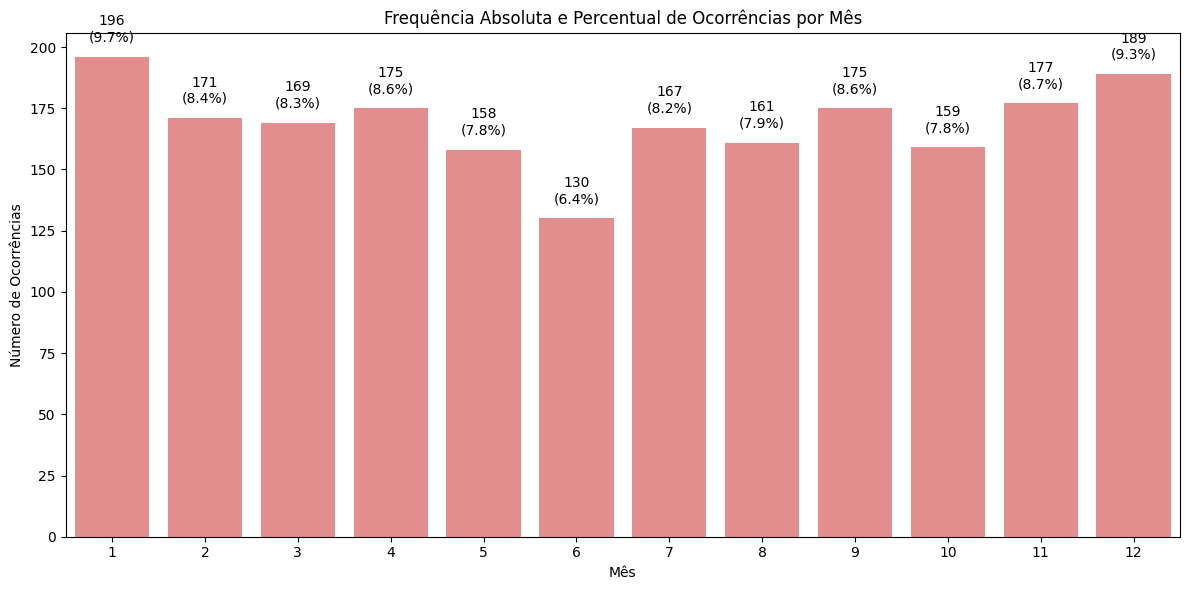

In [170]:
#criação de um gráfico de ocorrencias por mes

frequencia_mes = df_tab_analise_ocorrencias['mes'].value_counts().sort_index()
frequencia_percentual_mes = df_tab_analise_ocorrencias['mes'].value_counts(normalize=True).sort_index() * 100


plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frequencia_mes.index, y=frequencia_mes.values, color='lightcoral')


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            '{:.0f}\n({:.1f}%)'.format(frequencia_mes.values[i], frequencia_percentual_mes.values[i]),
            ha="center", va='bottom')

plt.title('Frequência Absoluta e Percentual de Ocorrências por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Os meses em que predominam ocorrências aéreas estão entre Dezembro (12) a Janeiro (1), provavelmente devido ao maior fluxo aéreo durante o período.

**2.2.3 Ocorrências por Hora e Tipo de Operação**

- Análise de ocorrências em horários de pico e sua relação com o tipo de operação da aeronave.

Os 10 horários com maior volume de ocorrências são: ['20:30:00', '20:00:00', '17:00:00', '13:00:00', '12:00:00', '19:30:00', '13:30:00', '18:00:00', '19:00:00', '12:30:00']

Frequência de Tipo de Operação nos horários de pico:
tipo_operacao
PRIVADA          191
AGRÍCOLA          80
INSTRUÇÃO         54
TÁXI AÉREO        44
EXPERIMENTAL      34
POLICIAL          11
REGULAR            3
***                2
ESPECIALIZADA      2
NÃO REGULAR        1
Name: count, dtype: int64


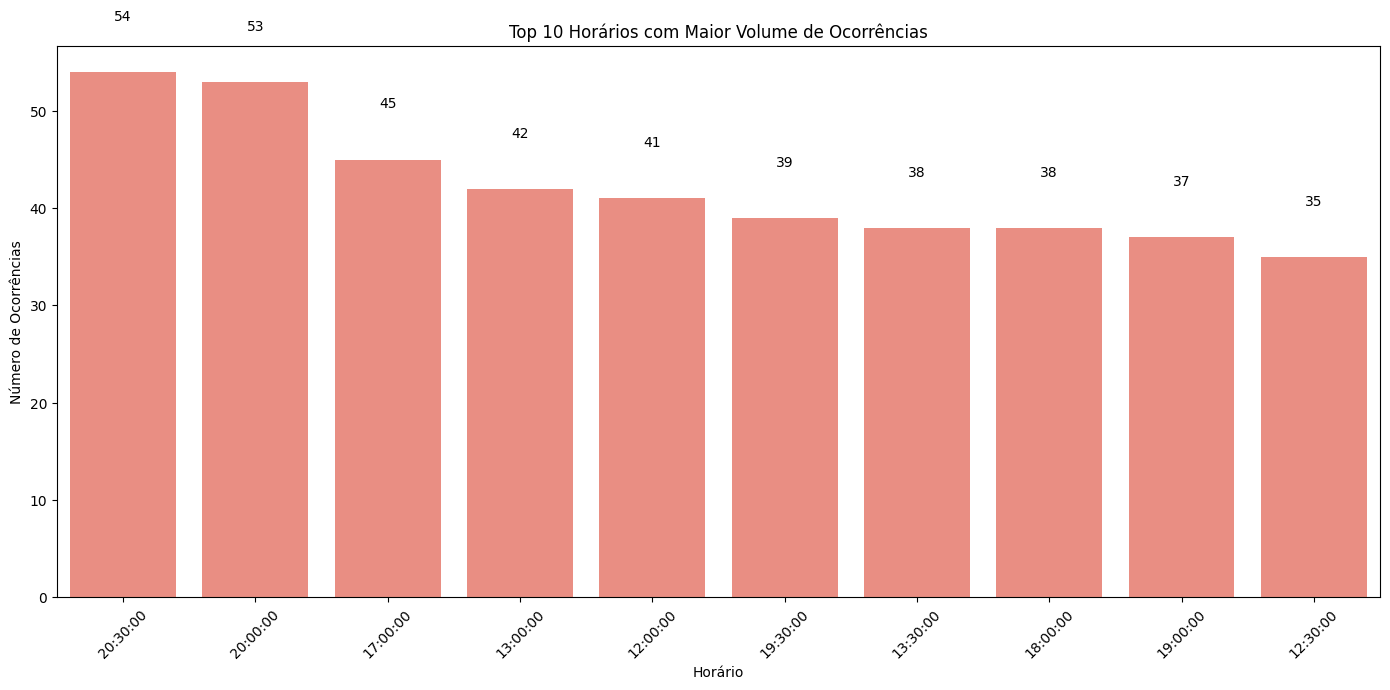

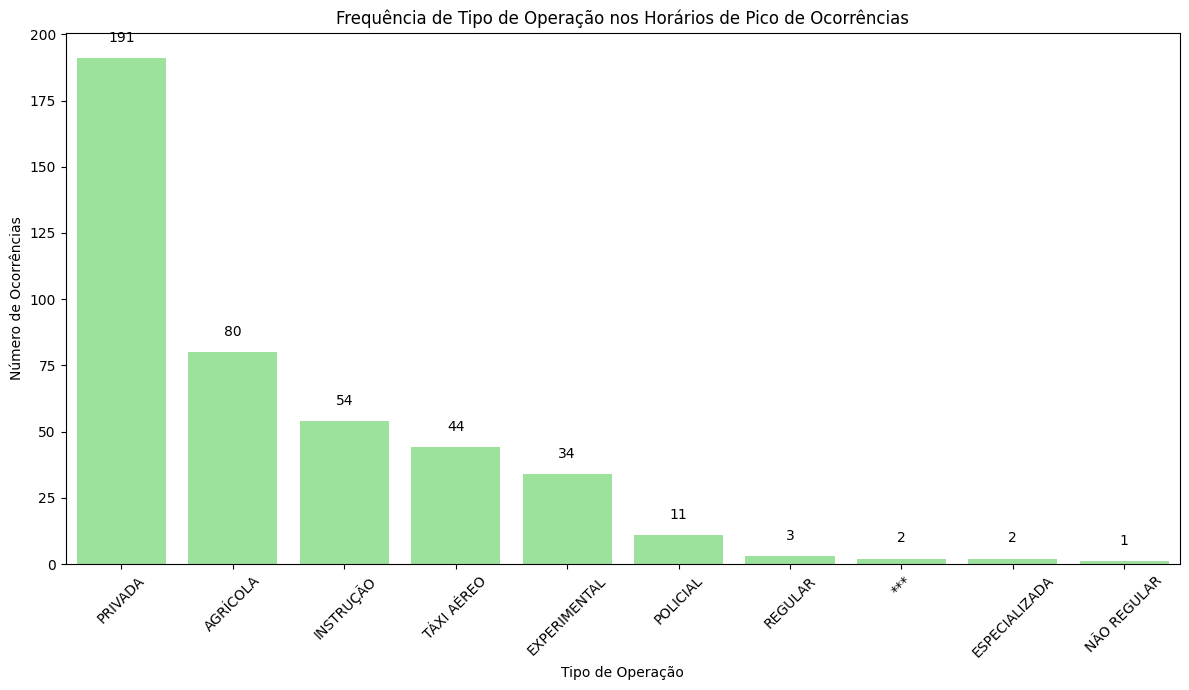

In [171]:
# Contar a frequência de ocorrências por horário

frequencia_horario = df_tab_analise_ocorrencias['horario'].value_counts().sort_index()

# Selecionar os 10 horários com maior volume de ocorrências
top_horarios = frequencia_horario.nlargest(10).index

print(f"Os 10 horários com maior volume de ocorrências são: {list(top_horarios)}")

# Filtrar o dataframe para incluir apenas as ocorrências nesses horários de pico
df_top_horarios = df_tab_analise_ocorrencias[df_tab_analise_ocorrencias['horario'].isin(top_horarios)]

# Analisar a frequência de tipo_operacao dentro desses horários de pico
frequencia_tipo_operacao_top_horarios = df_top_horarios['tipo_operacao'].value_counts()

print("\nFrequência de Tipo de Operação nos horários de pico:")
print(frequencia_tipo_operacao_top_horarios)

# Gráfico de barras para os horários com maior volume de ocorrências
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=top_horarios, y=frequencia_horario[top_horarios].values, color='salmon')

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            '{:.0f}'.format(height),
            ha="center", va='bottom')

plt.title('Top 10 Horários com Maior Volume de Ocorrências')
plt.xlabel('Horário')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras para o tipo de operação nos horários de pico
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=frequencia_tipo_operacao_top_horarios.index, y=frequencia_tipo_operacao_top_horarios.values, color='lightgreen')

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            '{:.0f}'.format(height),
            ha="center", va='bottom')

plt.title('Frequência de Tipo de Operação nos Horários de Pico de Ocorrências')
plt.xlabel('Tipo de Operação')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Os horários com maior volume de ocorrências concentram-se entre o meio da tarde e o início da noite, especialmente das 12h às 20h30, período que coincide com maior intensidade da atividade aérea. Essa concentração sugere que o risco ou registro de incidentes está associado ao aumento do fluxo de operações nesses horários.

- Entre os tipos de operação nos horários de pico, a aviação privada lidera com folga, seguida pelas operações agrícolas e de instrução, indicando que esses segmentos são responsáveis pela maioria das ocorrências registradas nesse período. Essa distribuição aponta para a necessidade de atenção especial à segurança nessas modalidades durante os horários de maior atividade.

**2.3 Análise dos Fatores Contribuintes**:
     

- Nesta seção, apresentamos a distribuição dos fatores causadores mais frequentemente identificados nas ocorrências investigadas. O objetivo é entender quais categorias — como fator humano, material, operacional ou outros — predominam nas investigações, oferecendo um panorama inicial sobre as possíveis causas das ocorrências aeronáuticas.

- Embora essa análise não constitua uma hipótese formal nem envolva testes estatísticos, ela é fundamental para orientar futuras investigações e formulação de hipóteses a serem testadas.

 Os fatores só são apresentados em ocorrencias finalizadas, poranto é criado um nodo dataframe (df_ocorrencias_finalizadas) contendo somente 'status_investigacao' = FINALIZADA

In [172]:
# Criação de novo dataframe contendo status_investigacao = FINALIZADA

df_ocorrencias_finalizadas = df_tab_analise_ocorrencias[df_tab_analise_ocorrencias['status_investigacao'] == 'FINALIZADA']

- A quantidade de registros contendo ocorrências finalizadas é significativo, portanto válido para as análises considerando fatores que foram one-hoterizados no arquivo 01-Tratamento_dos_dados.

In [173]:
# Quantidade de investigações finalizadas
print(len(df_ocorrencias_finalizadas))

1059


**2.3.1 Frequência dos Fatores Causadores**


- Gráfico de número de ocorrências por fator contribuinte observado na investigação.

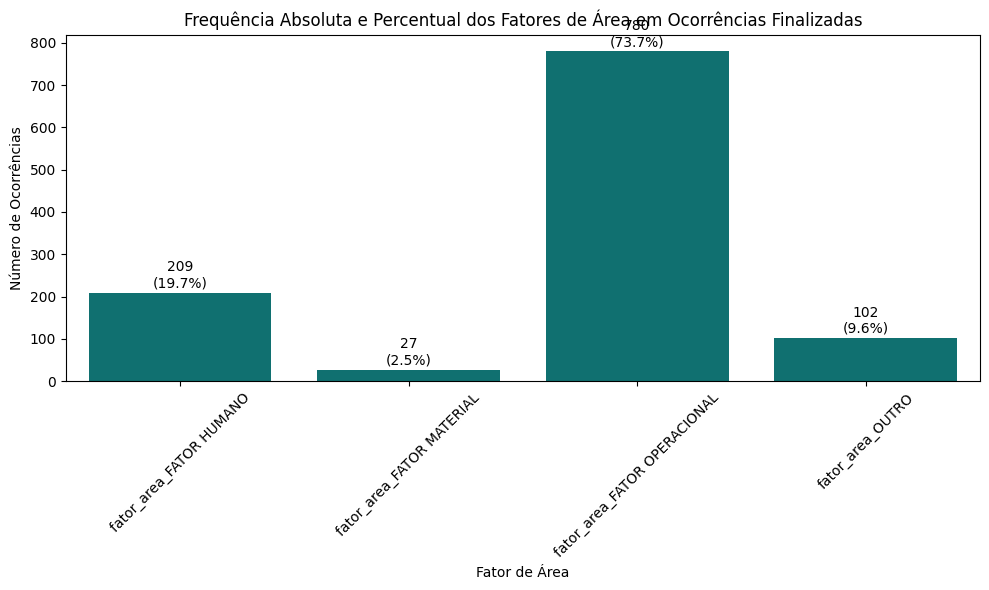

In [174]:
# Criação de gráfico contendo o principais fatores causadores observados na investigação.

fator_area_cols = ['fator_area_FATOR HUMANO', 'fator_area_FATOR MATERIAL', 'fator_area_FATOR OPERACIONAL', 'fator_area_OUTRO']
df_fator_area = df_ocorrencias_finalizadas[fator_area_cols]


contagem_absoluta = df_fator_area.sum()


frequencia_percentual = df_fator_area.mean() * 100


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=contagem_absoluta.index, y=contagem_absoluta.values, color='teal')


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            '{:.0f}\n({:.1f}%)'.format(contagem_absoluta.values[i], frequencia_percentual.values[i]),
            ha="center", va='bottom')

plt.title('Frequência Absoluta e Percentual dos Fatores de Área em Ocorrências Finalizadas')
plt.xlabel('Fator de Área')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 - É observado que o fator Operacional é o mais presente nas ocorrências investigadas, representando a maior proporção entre os fatores contribuintes.
Isso indica que muitos dos incidentes e acidentes estão relacionados a aspectos operacionais, como procedimentos, condições de voo, ou decisões tomadas durante a operação da aeronave.
Essa predominância sugere que melhorias em treinamento, processos operacionais e protocolos podem ter impacto significativo na redução dessas ocorrências.
- Além disso, essa observação orienta a investigação para focar em aspectos humanos e sistêmicos, ampliando o entendimento das causas subjacentes.

**2.3.2 Fatalidades por Localidade ao Longo dos Anos**


- Análise espacial-temporal de fatalidades, com destaque para os eventos com maior impacto.


Frequência de Fatalidades por Ano e Localidade em Ocorrências Finalizadas:
      ano      localidade  quantidade_fatalidades
0    2006   ALTO ARAGUAIA                     4.0
1    2006          ANADIA                     0.0
2    2006  ANGRA DOS REIS                     1.0
3    2006       APUCARANA                     1.0
4    2006           BAGRE                     0.0
..    ...             ...                     ...
853  2015      TERRA ROXA                     0.0
854  2015          TOLEDO                     1.0
855  2015      UBERLÂNDIA                     0.0
856  2015        UMUARAMA                     0.0
857  2015          VIÇOSA                     0.0

[858 rows x 3 columns]


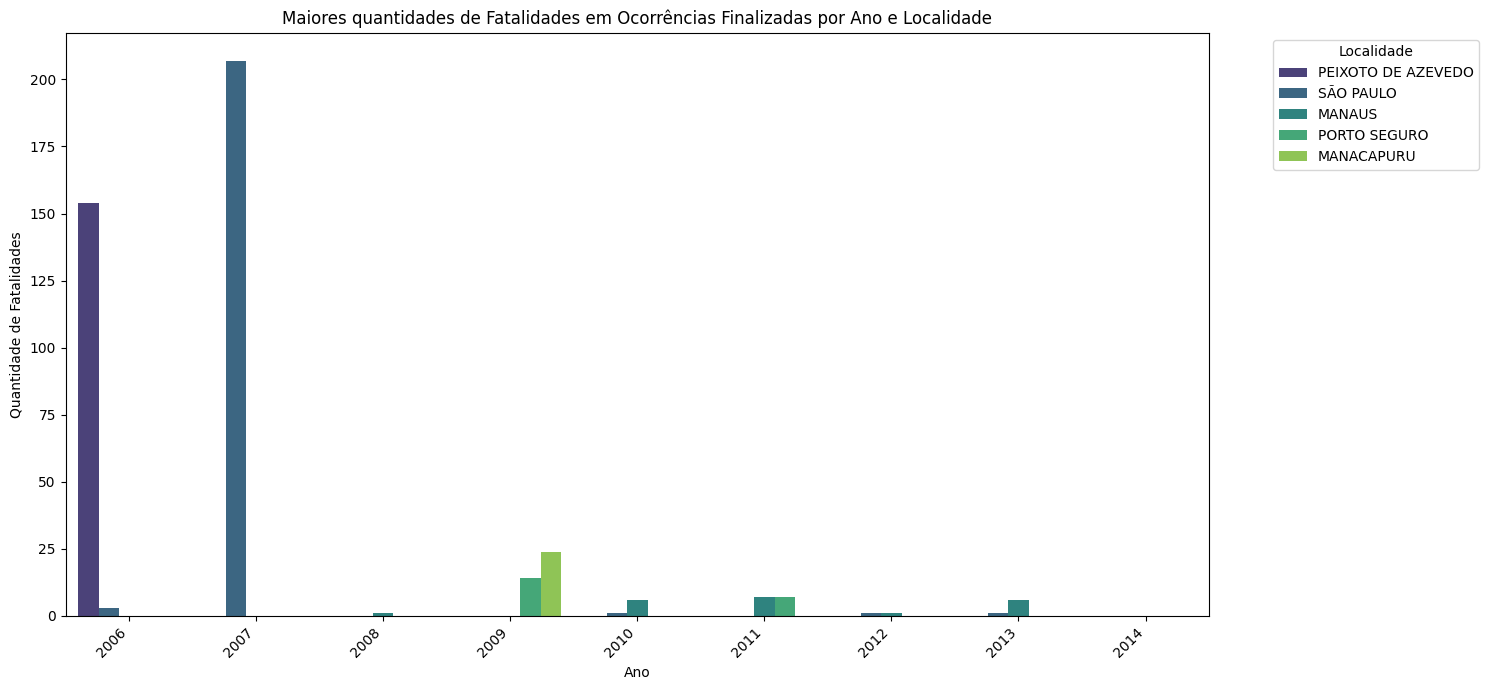

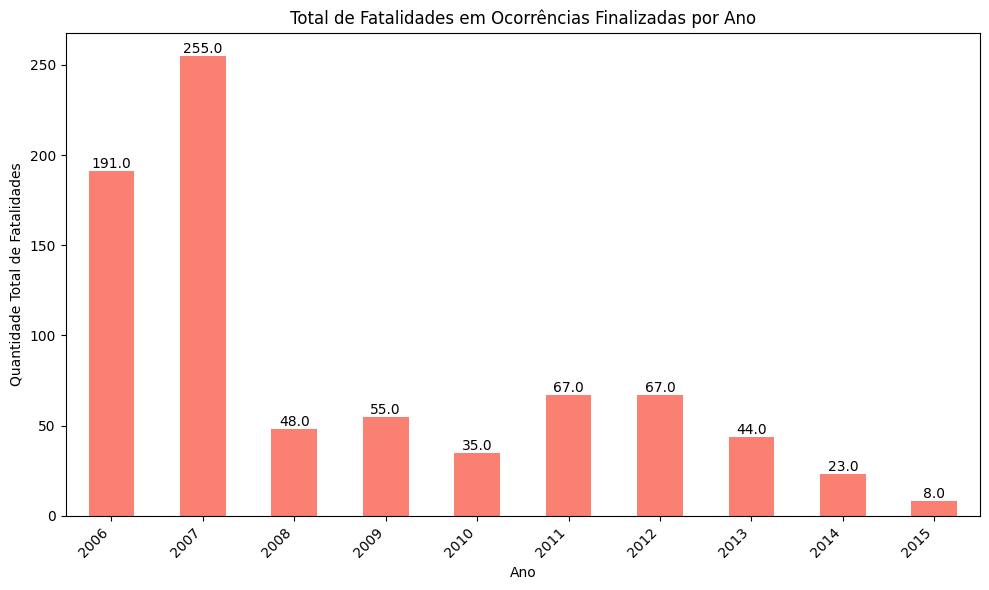

In [175]:
# Gráfico contendo a quantidade de fatalidades por localidade ao longo dos anos.

fat_ano_loc = df_ocorrencias_finalizadas.groupby(['ano', 'localidade'])['quantidade_fatalidades'].sum().reset_index()

print("\nFrequência de Fatalidades por Ano e Localidade em Ocorrências Finalizadas:")
print(fat_ano_loc)

# 5 maiores registros de fatalidades
localidade_fat = fat_ano_loc.groupby('localidade')['quantidade_fatalidades'].sum().sort_values(ascending=False).head(5).index.tolist()

df_top_localidades = fat_ano_loc[fat_ano_loc['localidade'].isin(localidade_fat)]

plt.figure(figsize=(15, 7))
sns.barplot(data=df_top_localidades, x='ano', y='quantidade_fatalidades', hue='localidade', palette='viridis')
plt.title('Maiores quantidades de Fatalidades em Ocorrências Finalizadas por Ano e Localidade')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Fatalidades')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Localidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#fatalidades totais por ano
fat_ano_loc = df_ocorrencias_finalizadas.groupby('ano')['quantidade_fatalidades'].sum()

plt.figure(figsize=(10, 6))
fatalities_total_by_year.plot(kind='bar', color='salmon')
plt.title('Total de Fatalidades em Ocorrências Finalizadas por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade Total de Fatalidades')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


for index, value in enumerate(fat_ano_loc):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

É observado que as maiores fatalidades aconteceram em 2006 e 2006, nas localidades de São Paulo e Peixoto de Azevedo, consecutivamente.
- O acidente ocorrido em São Paulo em 2007 trata-se do trágico caso do voo TAM JJ3054, que colidiu com um prédio após o pouso no Aeroporto de Congonhas, resultando em 199 fatalidades. Foi o maior número de mortes já registrado em um único acidente aéreo na história da aviação brasileira. Este evento evidenciou falhas na infraestrutura aeroportuária, operação sob pista molhada e procedimentos de pouso, sendo um marco para revisões regulatórias.

- Já o acidente em Peixoto de Azevedo, no estado do Mato Grosso, em 2006, corresponde ao caso do voo Gol 1907, que colidiu no ar com uma aeronave Legacy, resultando na morte de 154 pessoas. Esse acidente levantou importantes discussões sobre controle de tráfego aéreo, comunicação entre aeronaves e segurança de voo em espaço aéreo brasileiro, desencadeando mudanças na forma como o controle aéreo e o monitoramento de voos são realizados no país.

##2.3.3. Armazenamento do arquivo final para etapa de hipóteses e estatística

In [195]:
df_ocorrencias_finalizadas.to_csv('/content/drive/MyDrive/DESAFIOA3DATA/base_tratada/df_ocorrencias_finalizadas.csv', index=False)

✅ **Resultado da Etapa:**  
A etapa de EDA (Exploratory Data Analysis) tem como objetivo entender o comportamento das variáveis, levantar padrões, relações relevantes e subsidiar hipóteses para análises para a próxima fase(`03_hipoteses_estatistica.ipynb`)(como clusterização ou testes estatísticos).

